# Airqdata: analysis tools for air quality data

**Table of contents**  
[Civic Labs resources](#Civic-Labs-resources)  
[Madavi.de resources](#Madavi.de-resources)  
[Luftdaten.info resources](#Luftdaten.info-resources)  
[Irceline.be resources](#Irceline.be-resources)  
[Combining the sources](#Combining-the-sources)

In [1]:
%matplotlib inline

In [2]:
%run airqdata
pd.set_option("display.max_rows", 10)

## Civic Labs resources

### Download list of sensors from Civic Labs' Google Sheet

In [3]:
sensor_info = civiclabs.get_sensor_info(refresh_cache=True)
sensor_info.head(4)

,Chip ID,PM Sensor ID,Hum/Temp Sensor ID,Address,Floor,Side
0,4021549,3445,NaN,"Avenue Princesse Elisabeth 28, Schaarbeek",2,Street
1,4022301,3803,NaN,"Rue Brogniez, Anderlecht",2,Street
2,4020466,3805,NaN,"Rue de l'Équateur, Uccle",NaN,Garden
3,4018142,3893,3894,"Avenue de la Renaissance 10, Bruxelles",4,Street


In [4]:
len(sensor_info)

50

In [5]:
demo_chip_id = "956245"
demo_sensor_id = "5561"

In [6]:
sensor_info[sensor_info["PM Sensor ID"] == demo_sensor_id]

,Chip ID,PM Sensor ID,Hum/Temp Sensor ID,Address,Floor,Side
10,956245,5561,5562,Central station,2,Street


## Madavi.de resources

### Open web pages in browser showing data history graphs of a sensor

In [7]:
# Particulate matter
madavi.open_graphs(demo_chip_id)

# Temperature and humidity
madavi.open_graphs(demo_chip_id, sensor_model="dht")

## Luftdaten.info resources

### Create a Sensor object and get the sensor's current data

In [8]:
demo_sensor = luftdaten.Sensor(demo_sensor_id, refresh_cache=True)
demo_sensor

<luftdaten.info sensor 5561 at 0x7f4fbb9b5f98>

In [9]:
demo_sensor.metadata

id                                    777778264
location.altitude                          33.9
location.country                             BE
location.id                                2804
location.latitude                        50.846
                                       ...     
sensor.id                                  5561
sensor.pin                                    1
sensor.sensor_type.id                        14
sensor.sensor_type.manufacturer    Nova Fitness
sensor.sensor_type.name                  SDS011
Name: metadata, Length: 12, dtype: object

In [10]:
demo_sensor.url

'https://api.luftdaten.info/v1/sensor/5561/'

In [11]:
demo_sensor.current_values

{'pm10': 47.72, 'pm2.5': 26.95}

### Retrieve data history
Data are retrieved from cache or server and then cleaned (see luftdaten.Sensor.clean_data).

In [12]:
demo_sensor.get_data(start_date="2018-02-04", end_date="2018-02-08")

Using cached luftdaten.info data for sensor 5561 on 2018-02-04
Using cached luftdaten.info data for sensor 5561 on 2018-02-05
Using cached luftdaten.info data for sensor 5561 on 2018-02-06
Using cached luftdaten.info data for sensor 5561 on 2018-02-07
Using cached luftdaten.info data for sensor 5561 on 2018-02-08


### Inspect, summarize and plot data

In [13]:
demo_sensor.measurements

,pm10,pm2.5
timestamp,,
2018-02-04 00:01:30+00:00,38.72,20.40
2018-02-04 00:03:58+00:00,46.00,23.48
2018-02-04 00:06:25+00:00,50.75,21.62
2018-02-04 00:08:53+00:00,39.80,21.58
2018-02-04 00:11:20+00:00,37.80,22.50
...,...,...
2018-02-08 23:47:43+00:00,38.97,23.05
2018-02-08 23:50:10+00:00,48.00,25.65
2018-02-08 23:52:37+00:00,35.90,22.37


In [14]:
describe(demo_sensor.measurements)

,pm10,pm2.5
count,2887.00,2887.00
mean,30.66,17.20
std,15.60,6.76
min,2.97,2.62
1%,4.03,3.47
50%,30.02,17.15
99%,70.94,32.09
max,127.00,53.85


In [15]:
describe(demo_sensor.measurements)

,pm10,pm2.5
count,2887.00,2887.00
mean,30.66,17.20
std,15.60,6.76
min,2.97,2.62
1%,4.03,3.47
50%,30.02,17.15
99%,70.94,32.09
max,127.00,53.85


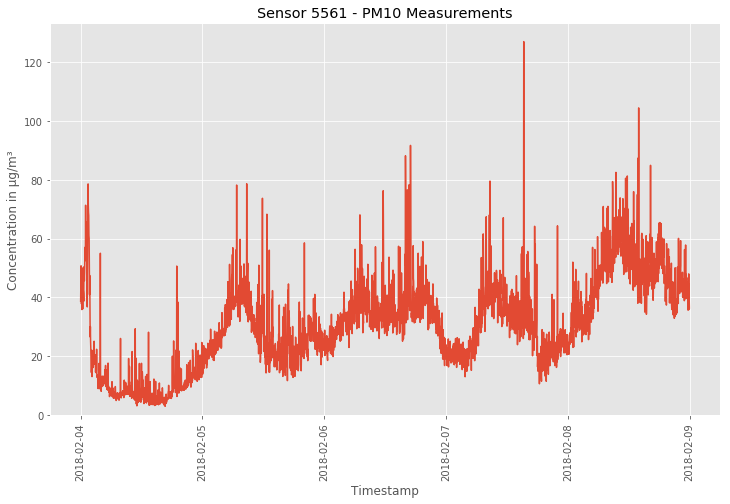

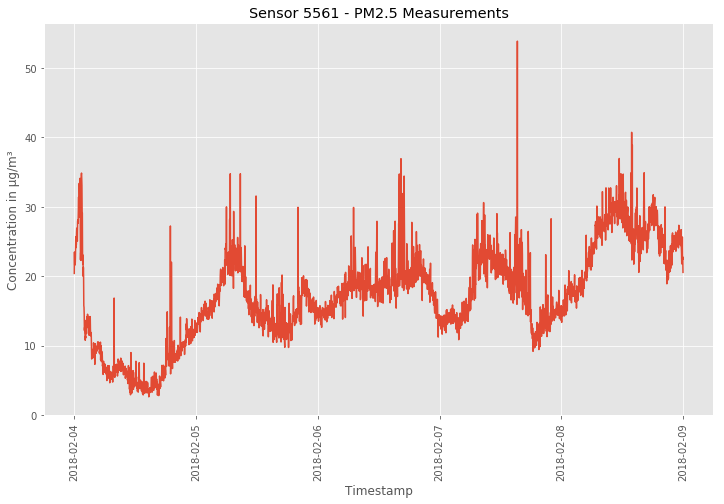

In [16]:
demo_sensor.plot_measurements()

### Inspect, summarize and plot hourly means

In [17]:
demo_sensor.hourly_means

,pm10,pm2.5
Period,,
2018-02-04 00:00,45.39,25.58
2018-02-04 01:00,53.93,26.17
2018-02-04 02:00,18.44,12.84
2018-02-04 03:00,14.55,10.26
2018-02-04 04:00,11.55,9.61
...,...,...
2018-02-08 19:00,46.58,25.29
2018-02-08 20:00,41.01,22.93
2018-02-08 21:00,40.88,22.59


In [18]:
describe(demo_sensor.hourly_means)

,pm10,pm2.5
count,120.00,120.00
mean,30.71,17.23
std,14.15,6.44
min,5.07,3.79
1%,5.35,4.00
50%,31.91,17.65
99%,60.01,29.68
max,60.90,29.91


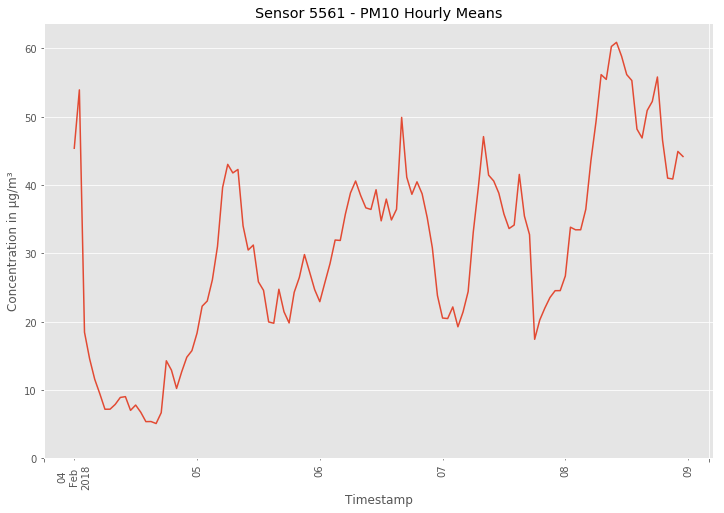

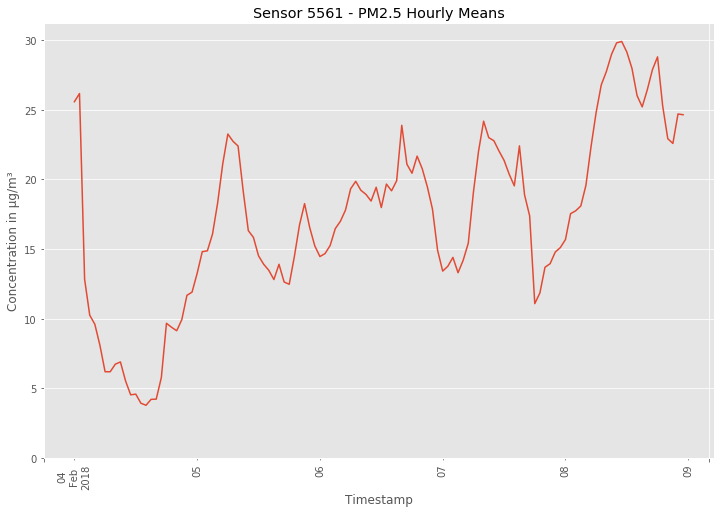

In [19]:
demo_sensor.plot_hourly_means()

### Check distribution of sample intervals
In seconds

In [20]:
demo_sensor.intervals.sort_values(ascending=False).head(10)

147.0    1235
148.0     740
149.0     279
146.0     193
150.0     125
151.0      69
155.0      41
154.0      33
152.0      31
156.0      22
Name: timestamp, dtype: int64

### List sensors near a given location

Defaults to searching within an 8 kilometer radius around the center of Brussels

In [21]:
near = luftdaten.search_proximity()
near

,sensor_type,latitude,longitude,distance
sensor_id,,,,
5562,DHT22,50.85,4.36,0.48
5561,SDS011,50.85,4.36,0.48
2905,DHT22,50.85,4.34,0.84
2904,SDS011,50.85,4.34,0.84
7096,HPM,50.85,4.34,0.84
...,...,...,...,...
5829,SDS011,50.83,4.39,3.29
7899,SDS011,50.86,4.40,3.83
7900,DHT22,50.86,4.40,3.83


Sensors near Antwerp

In [22]:
luftdaten.search_proximity(lat=51.22, lon=4.41, radius=20)

,sensor_type,latitude,longitude,distance
sensor_id,,,,
5937,SDS011,51.22,4.41,0.24
5938,DHT22,51.22,4.41,0.24
6051,SDS011,51.20,4.43,2.30
2588,SDS011,51.20,4.44,3.10
2589,DHT22,51.20,4.44,3.10
...,...,...,...,...
6085,SDS011,51.23,4.48,4.75
9496,SDS011,51.27,4.46,6.45
9497,DHT22,51.27,4.46,6.45


No data for sensor 2390
No data for sensor 4879
No data for sensor 5829
No data for sensor 7575
No data for sensor 7899
No data for sensor 9498
No data for sensor 9504


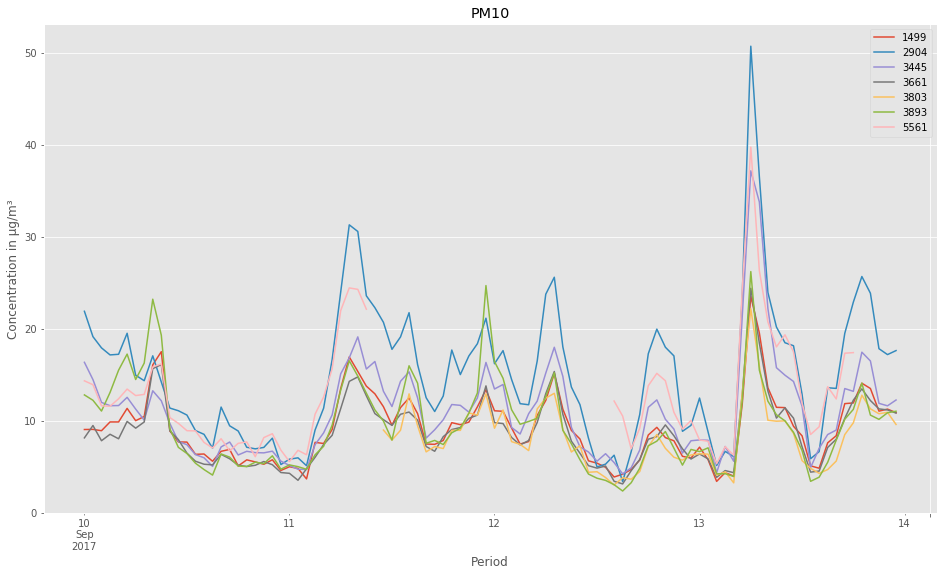

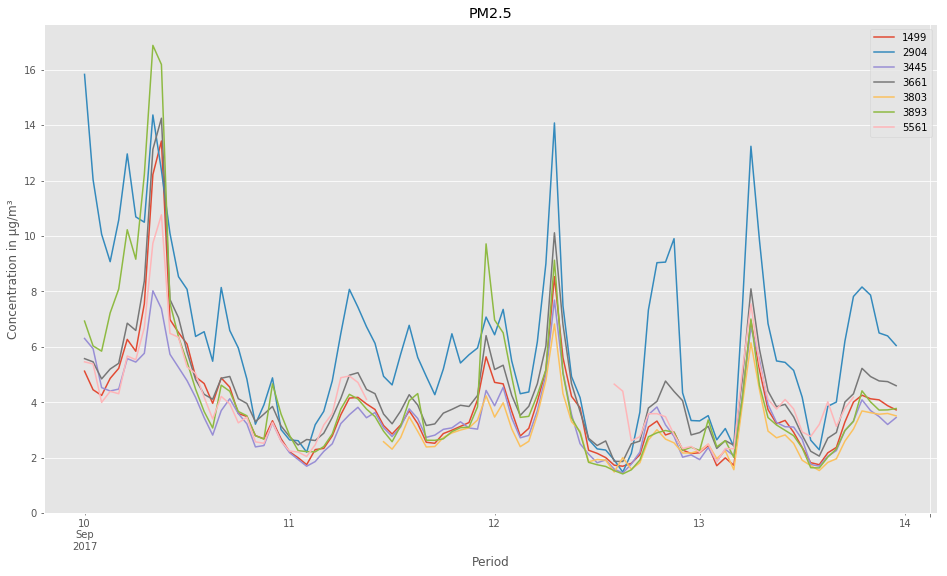

In [23]:
(near_sensors,
 hourly_means) = luftdaten.evaluate_near_sensors(start_date="2017-09-10",
                                                 end_date="2017-09-13",
                                                 quiet=True)

In [24]:
hourly_means

pm10                                           pm2.5  \
                   1499   2904   3445   3661   3803   3893   5561  1499   
Period                                                                    
2017-09-10 00:00   9.08  21.92  16.38   8.18    NaN  12.84  14.37  5.13   
2017-09-10 01:00   9.10  19.16  14.50   9.52    NaN  12.26  13.95  4.45   
2017-09-10 02:00   8.95  17.95  12.03   7.87    NaN  11.09  11.66  4.25   
2017-09-10 03:00   9.91  17.18  11.67   8.57    NaN  13.10  11.61  4.86   
2017-09-10 04:00   9.91  17.25  11.69   8.08    NaN  15.52  12.42  5.23   
...                 ...    ...    ...    ...    ...    ...    ...   ...   
2017-09-13 19:00  14.11  25.69  17.48  13.50  12.81  14.12    NaN  4.26   
2017-09-13 20:00  13.54  23.88  16.52  12.23  11.33  10.65    NaN  4.13   
2017-09-13 21:00  11.08  17.86  11.93  11.32  10.80  10.19    NaN  4.09   
2017-09-13 22:00  11.30  17.22  11.66  11.21  10.95  10.90    NaN  3.88   
2017-09-13 23:00  10.92  17.65  12.29  10.87   9.63  11.07    NaN  3.73   

                                                       
                   2904  3445  3661  3803  3893  5561  
Period                                                 
2017-09-10 00:00  15.83  6.31  5.58   NaN  6.93  5.46  
2017-09-10 01:00  12.04  5.94  5.46   NaN  6.04  5.38  
2017-09-10 02:00  10.07  4.53  4.85   NaN  5.85  4.00  
2017-09-10 03:00   9.08  4.41  5.20   NaN  7.23  4.40  
2017-09-10 04:00  10.58  4.48  5.41   NaN  8.09  4.31  
...                 ...   ...   ...   ...   ...   ...  
2017-09-13 19:00   8.16  4.09  5.23  3.69  4.42   NaN  
2017-09-13 20:00   7.87  3.70  4.93  3.63  4.02   NaN  
2017-09-13 21:00   6.50  3.49  4.77  3.57  3.72   NaN  
2017-09-13 22:00   6.40  3.20  4.75  3.60  3.73   NaN  
2017-09-13 23:00   6.05  3.45  4.60  3.51  3.78   NaN  

[96 rows x 14 columns]

## Irceline.be resources

### Get IRCELINE metadata about phenomena and stations

In [25]:
irceline.Metadata()

Using cached phenomenon metadata
Using cached station metadata
Using cached time series metadata


In [26]:
irceline.Metadata.phenomena

,label
id,
1,Sulphur dioxide
10,Carbon Monoxide
20,Benzene
21,Toluene
38,Nitrogen monoxide
...,...
61110,wind speed (scalar)
62101,temperature
7,Ozone


In [27]:
irceline.Metadata.stations

,label,lat,lon
id,,,
1030,40AL01 - LINKEROEVER,51.24,4.39
1031,40AL02 - BEVEREN,51.30,4.23
1032,40AL03 - BEVEREN,51.25,4.20
1033,40AL04 - BEVEREN,51.29,4.29
1034,40AL05 - BEVEREN,51.26,4.28
...,...,...,...
1240,47E715 - ZUIENKERKE,51.25,3.17
1241,47E716 - MARIAKERKE,51.07,3.68
1242,47E804 - Kallo,51.28,4.31


In [28]:
irceline.Metadata.get_stations_by_name("bru")

,label,lat,lon
id,,,
1110,41B004 - Bruxelles (Sainte-Catherine),50.85,4.35
1112,41B006 - Bruxelles (Parlement UE),50.84,4.37
1711,41B008 - Brussel (Beliardstraat),50.84,4.38


In [29]:
irceline.Metadata.time_series

,label,phenomenon,unit,station_id,station_label,station_lat,station_lon
id,,,,,,,
6522,"1,2-XYLENE O-XYLENE 6522 - btx, o-xyleen - pro...","1,2-XYLENE O-XYLENE",µg/m³,1112,41B006 - Bruxelles (Parlement UE),50.84,4.37
6202,"Benzene 6202 - ? - procedure, 40GK09 - GENK",Benzene,µg/m³,1045,40GK09 - GENK,50.93,5.49
6274,"Benzene 6274 - Synspec - procedure, 40LD01 - L...",Benzene,µg/m³,1058,40LD01 - LAAKDAL,51.11,5.00
6283,"Benzene 6283 - Synspec - procedure, 40LD02 - L...",Benzene,µg/m³,1059,40LD02 - LAAKDAL,51.12,5.02
6487,Benzene 6487 - Airmotec 10000S plus benzeen - ...,Benzene,µg/m³,1107,40ZL01 - ZELZATE,51.20,3.81
...,...,...,...,...,...,...,...
99904,wind speed (scalar) 99904 - Unknown device - p...,wind speed (scalar),m/s,1198,44M705 - ROESELARE,50.95,3.15
99907,wind speed (scalar) 99907 - Unknown device - p...,wind speed (scalar),m/s,1207,44R701 - GENT,51.06,3.73
99910,wind speed (scalar) 99910 - Unknown device - p...,wind speed (scalar),m/s,1127,42M802 - ANTWERPEN,51.26,4.42


### How many stations measure a given phenomenon?

In [30]:
irceline.Metadata.time_series["phenomenon"].value_counts()

Nitrogen dioxide               91
Nitrogen monoxide              91
Particulate Matter < 10 µm     66
Particulate Matter < 2.5 µm    64
Sulphur dioxide                53
                               ..
1,2-XYLENE O-XYLENE             1
Particulate Matter < 1 µm       1
Toluene                         1
Ethylbenzene                    1
M+P-xylene                      1
Name: phenomenon, Length: 19, dtype: int64

### How many phenomena does a given station measure?

In [31]:
irceline.Metadata.time_series["station_label"].value_counts().head()

44R701 - GENT                        12
41R001 - Molenbeek-Saint-Jean        11
44N029 - HOUTEM                      11
41R012 - UCCLE                       11
41B006 - Bruxelles (Parlement UE)     9
Name: station_label, dtype: int64

In [32]:
pd.set_option("display.max_rows", 6)

### Where is a given phenomenon measured?

In [33]:
irceline.Metadata.query_time_series(phenomenon="ethylbenzene")

,label,phenomenon,unit,station_id,station_label,station_lat,station_lon
id,,,,,,,
6521,"Ethylbenzene 6521 - btx, ethylbenzeen - proced...",Ethylbenzene,µg/m³,1112,41B006 - Bruxelles (Parlement UE),50.84,4.37


### Where is PM2.5 measured?

In [34]:
irceline.Metadata.get_pm25_time_series()

,label,phenomenon,unit,station_id,station_label,station_lat,station_lon
id,,,,,,,
100001,Particulate Matter < 2.5 µm 100001 - Unknown d...,Particulate Matter < 2.5 µm,µg/m³,1044,40GK06 - GENK,50.93,5.47
100005,Particulate Matter < 2.5 µm 100005 - Unknown d...,Particulate Matter < 2.5 µm,µg/m³,1070,40RL01 - ROESELARE,50.95,3.12
100006,Particulate Matter < 2.5 µm 100006 - Unknown d...,Particulate Matter < 2.5 µm,µg/m³,1066,40OB01 - OOSTROZEBEK,50.92,3.31
...,...,...,...,...,...,...,...
99997,Particulate Matter < 2.5 µm 99997 - Unknown de...,Particulate Matter < 2.5 µm,µg/m³,1200,44N012 - MOERKERKE,51.25,3.36
99998,Particulate Matter < 2.5 µm 99998 - Unknown de...,Particulate Matter < 2.5 µm,µg/m³,1208,44R710 - DESTELBERGE,51.06,3.78
99999,Particulate Matter < 2.5 µm 99999 - Unknown de...,Particulate Matter < 2.5 µm,µg/m³,1048,40HB23 - HOBOKEN,51.17,4.34


### Where is PM10 measured?

In [35]:
irceline.Metadata.get_pm10_time_series()

,label,phenomenon,unit,station_id,station_label,station_lat,station_lon
id,,,,,,,
10600,Particulate Matter < 10 µm 10600 - - procedur...,Particulate Matter < 10 µm,µg/m³,1159,42R831 - BERENDRECHT,51.35,4.34
10610,Particulate Matter < 10 µm 10610 - Unknown dev...,Particulate Matter < 10 µm,µg/m³,1710,42R834 - Boom,51.09,4.38
10680,Particulate Matter < 10 µm 10680 - Unknown dev...,Particulate Matter < 10 µm,µg/m³,1714,40OB02 - Wielsbeke,50.91,3.38
...,...,...,...,...,...,...,...
7148,Particulate Matter < 10 µm 7148 - GRIMM - proc...,Particulate Matter < 10 µm,µg/m³,1219,45R510 - CHATELINEAU,50.42,4.52
7151,Particulate Matter < 10 µm 7151 - GRIMM - proc...,Particulate Matter < 10 µm,µg/m³,1220,45R511 - MARCINELLE,50.38,4.42
7162,Particulate Matter < 10 µm 7162 - GRIMM - proc...,Particulate Matter < 10 µm,µg/m³,1221,45R512 - MARCHIENNE,50.41,4.40


### What are the closest locations to Etterbeek where IRCELINE measures NO₂?
Using a location in Etterbeek as a reference point: 50.837°N 4.39°E

In [36]:
irceline.Metadata.query_time_series("nitrogen dioxide", lat_nearest=50.837, lon_nearest=4.39)

,label,phenomenon,unit,station_id,station_label,station_lat,station_lon,distance
id,,,,,,,,
10614,Nitrogen dioxide 10614 - Unknown device - proc...,Nitrogen dioxide,µg/m³,1711,41B008 - Brussel (Beliardstraat),50.84,4.38,1.06
6516,Nitrogen dioxide 6516 - AC-31M (Environnement)...,Nitrogen dioxide,µg/m³,1112,41B006 - Bruxelles (Parlement UE),50.84,4.37,1.11
6615,Nitrogen dioxide 6615 - AC-31M (Environnement)...,Nitrogen dioxide,µg/m³,1119,41R002 - Ixelles,50.83,4.38,1.37
...,...,...,...,...,...,...,...,...
7047,"Nitrogen dioxide 7047 - THIS 42C - procedure, ...",Nitrogen dioxide,µg/m³,1202,44N029 - HOUTEM,51.02,2.58,128.25
6934,Nitrogen dioxide 6934 - API 200A 1849 - proced...,Nitrogen dioxide,µg/m³,1180,43N085 - VIELSALM,50.30,6.00,128.37
6968,Nitrogen dioxide 6968 - Unknown device - proce...,Nitrogen dioxide,µg/m³,1185,43N132 - Habay-La-Neuve,49.72,5.63,152.36


### What does the Uccle station measure?

In [37]:
irceline.Metadata.list_station_time_series("ucc")

,label,phenomenon,unit,station_id,station_label
id,,,,,
10607,"Black Carbon 10607 - - procedure, 41R012 - UCCLE",Black Carbon,µg/m³,1122,41R012 - UCCLE
6619,Carbon Dioxide 6619 - This model 41H - procedu...,Carbon Dioxide,ppm,1122,41R012 - UCCLE
6622,Nitrogen dioxide 6622 - AC-31M (Environnement)...,Nitrogen dioxide,µg/m³,1122,41R012 - UCCLE
...,...,...,...,...,...
99941,temperature 99941 - Unknown device - procedure...,temperature,°C,1122,41R012 - UCCLE
99939,wind direction 99939 - Unknown device - proced...,wind direction,degrees,1122,41R012 - UCCLE
99940,wind speed (scalar) 99940 - Unknown device - p...,wind speed (scalar),m/s,1122,41R012 - UCCLE


### List stations near a location
Defaults to coordinates and radius of Brussels

In [38]:
irceline.Metadata.search_proximity(lat=50.9, lon=4.4, radius=5)

,label,lat,lon,distance
id,,,,
1116,41MEU1 - MEUDON,50.90,4.39,0.75
1117,41N043 - HAREN,50.88,4.38,2.18
1232,47E008 - Grimbergen,50.93,4.40,2.92
1143,42R010 - Sint-Stevens-Woluwe,50.87,4.43,4.36


## Combining the sources

In [39]:
pd.set_option("display.max_rows", 10)

### Which PM-measuring IRCELINE sensors are closest to a given Civic Labs sensor?

In [40]:
find_nearest_pm_time_series(sensor_id=demo_sensor_id, quiet=True)

,pm10,pm2.5
time series id,6578,6579
label,Particulate Matter < 10 µm 6578 - TEOM FDMS - ...,Particulate Matter < 2.5 µm 6579 - TEOM FDMS -...
phenomenon,Particulate Matter < 10 µm,Particulate Matter < 2.5 µm
unit,µg/m³,µg/m³
station_id,1118,1118
station_label,41R001 - Molenbeek-Saint-Jean,41R001 - Molenbeek-Saint-Jean
station_lat,51,51
station_lon,4.3,4.3
distance,1.7,1.7


### Compare sensor data to nearest IRCELINE station(s)

pm2.5           pm10       
                 station sensor station sensor
2018-02-01 00:00    5.45   3.80     9.0   8.89
2018-02-01 01:00    7.15   3.44    11.5   9.07
2018-02-01 02:00    7.10   3.13    11.5  10.61
2018-02-01 03:00    5.00   3.03    10.0  10.90
2018-02-01 04:00    5.10   2.58    10.5  10.75
...                  ...    ...     ...    ...
2018-02-08 19:00     NaN  25.29     NaN  46.58
2018-02-08 20:00     NaN  22.93     NaN  41.01
2018-02-08 21:00     NaN  22.59     NaN  40.88
2018-02-08 22:00     NaN  24.70     NaN  44.92
2018-02-08 23:00     NaN  24.65     NaN  44.18

[192 rows x 4 columns]

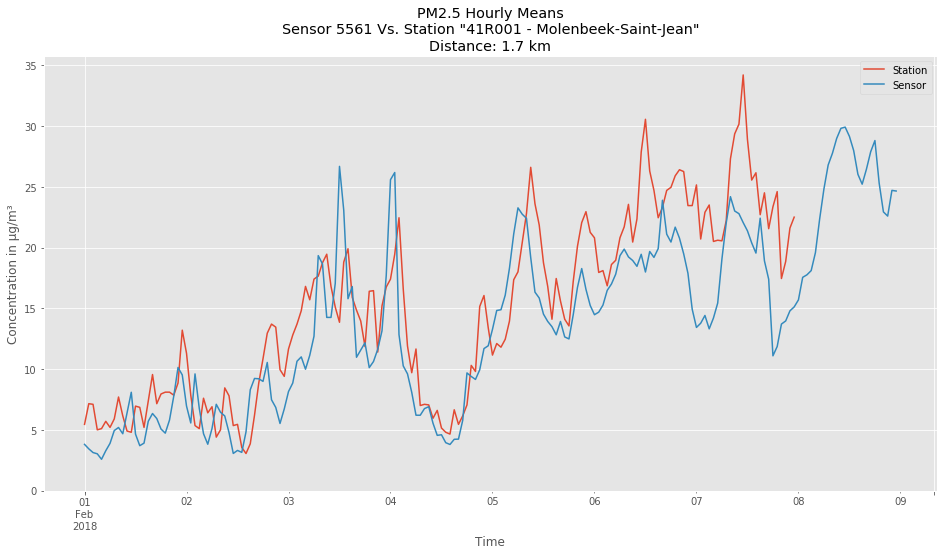

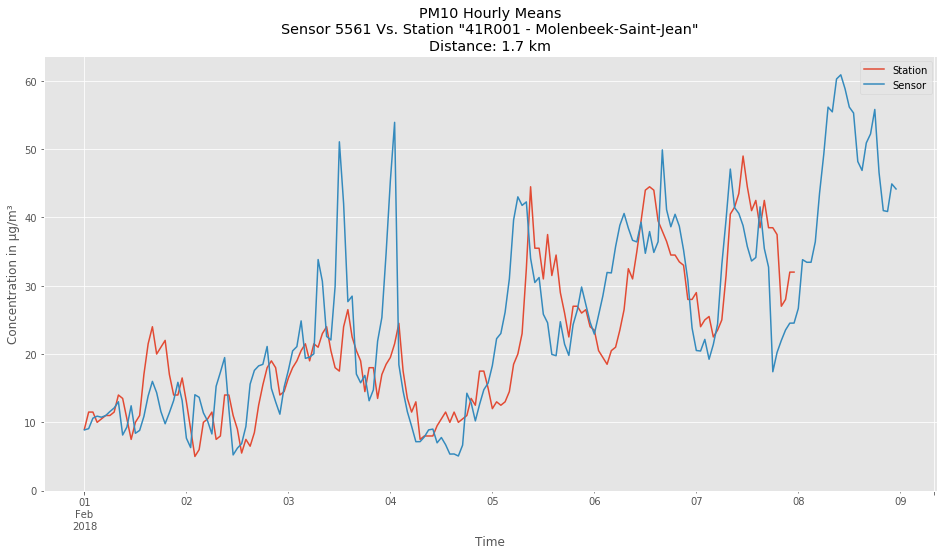

In [41]:
data, plots = compare_sensor_and_station(sensor_id=demo_sensor_id,
                                         start_date="2018-02-01",
                                         end_date="2018-02-08",
                                         quiet=True)
data

## Export data for use in another environment

In [42]:
# demo_sensor.measurements.to_csv("demo_sensor_data.csv")